# Car Evaluation
[Car Evaluation](https://github.com/gilbutITbook/080263/blob/master/chap2/python_2%EC%9E%A5.ipynb)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

### Columns 정보 
- price: 자동차 가격
- maint: 자동차 유지 비용
- doors: 자동차 문 개수
- persons: 수용인원
- lug_capacity: 수하물용량
- safety: 안정성
- output: 차상태, unacc(허용 불가능한 수준), acc(허용 가능한 수준), good(양호), very good(매우 좋은)

In [2]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('./data/car_evalutation.csv', names=cols, header=None)

In [3]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_capacity  1728 non-null   object
 5   safety        1728 non-null   object
 6   output        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
cars.isna().sum().sum()

0

In [6]:
cars['output'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: output, dtype: int64

<AxesSubplot:ylabel='output'>

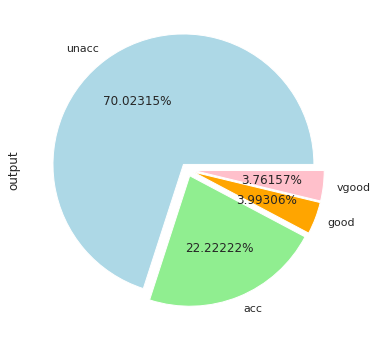

In [7]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', 
                                colors=['lightblue', 'lightgreen', 'orange', 'pink'], 
                                explode=(0.05, 0.05, 0.05,0.05))

In [8]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)
y = labels.values

In [9]:
X.head()

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_capacity_big,lug_capacity_med,lug_capacity_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [10]:
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [11]:
y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

### Split train/test datasets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Keras Model

In [13]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense (Dense)               (None, 15)                330       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


2022-10-20 14:04:26.904633: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-20 14:04:26.904679: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-46-96.ap-northeast-2.compute.internal): /proc/driver/nvidia/version does not exist
2022-10-20 14:04:26.905222: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 1s 2ms/step - loss: 1.1677 - acc: 0.6081 - val_loss: 1.0051 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 1ms/step - loss: 0.7452 - acc: 0.7195 - val_loss: 0.7478 - val_acc: 0.6498
Epoch 3/50
139/139 [==============================] - 0s 1ms/step - loss: 0.5386 - acc: 0.7457 - val_loss: 0.5656 - val_acc: 0.7581
Epoch 4/50
139/139 [==============================] - 0s 1ms/step - loss: 0.4083 - acc: 0.8344 - val_loss: 0.4642 - val_acc: 0.8267
Epoch 5/50
139/139 [==============================] - 0s 1ms/step - loss: 0.3357 - acc: 0.8661 - val_loss: 0.4022 - val_acc: 0.8484
Epoch 6/50
139/139 [==============================] - 0s 1ms/step - loss: 0.2888 - acc: 0.8824 - val_loss: 0.3577 - val_acc: 0.8556
Epoch 7/50
139/139 [==============================] - 0s 1ms/step - loss: 0.2549 - acc: 0.8887 - val_loss: 0.3325 - val_acc: 0.8592
Epoch 8/50
139/139 [==============================] - 0s 1ms/step - loss: 0.

In [22]:
history

In [15]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 731us/step - loss: 0.0799 - acc: 0.9769
Test Score: 0.07994689792394638
Test Accuracy: 0.9768785834312439


### Evaluation

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([[5.8967110e-08, 6.6540805e-13, 1.0000000e+00, 2.0071061e-14],
       [7.9540676e-01, 2.0415065e-01, 4.3710903e-04, 5.5424348e-06],
       [9.3759058e-07, 5.2270514e-12, 9.9999905e-01, 5.8143041e-16],
       ...,
       [1.1846924e-15, 1.2719436e-17, 1.0000000e+00, 1.1293464e-23],
       [2.2101424e-06, 7.5702194e-13, 9.9999774e-01, 1.9008018e-20],
       [1.9201972e-11, 4.4015843e-14, 1.0000000e+00, 1.9935425e-18]],
      dtype=float32)

In [19]:
y_test

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

print('Accuracy:', np.round(score, 3))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets